In [1]:
%matplotlib inline 

import datetime
import mysql.connector
import operator
import numpy as np
from scipy import special

import matplotlib as mlp
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 

import plotly 
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px

import ipywidgets as widgets

import pandas as pd
import datetime

#import seaborn as sb

In [2]:
#sb.set()

In [3]:
cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='bioeco')

sql_query = pd.read_sql_query('''select metabolite_id, 
                               count(price_per_g)                                                as num_price_per_g
                               from (
                                    select bioanalysis_metabolite_price.metabolite_id,
                                           bioanalysis_metabolite.common_name                    as metab_name,
                                           bioanalysis_metabolite_price.date, 
                                           bioanalysis_metabolite_price.price                    as price, 
                                           bioanalysis_metabolite_price.amount                   as amount, 
                                           bioanalysis_metabolite_price.unity                    as unity, 
                                           if(provider.name is null, "None", provider.name)       as provider_name, 
                                           price/amount                                          as price_per_unity,
                                           price/amount*convert_to_g(unity)                      as price_per_g
                                    from bioanalysis_metabolite_price
                                    JOIN provider 
                                        on provider.id = bioanalysis_metabolite_price.provider_id
                                    JOIN bioanalysis_metabolite
                                        on bioanalysis_metabolite_price.metabolite_id = bioanalysis_metabolite.id
                                    where convert_to_g(unity) is not null  #da apenas os preços por grama e derivados

                                ) as metab_prices
                                group by metabolite_id;''', cnx, parse_dates=True) #index_col = 'metabolite_id', 

df = pd.DataFrame(sql_query, columns=['metabolite_id','num_price_per_g'])

print(df)


      metabolite_id  num_price_per_g
0                 1              547
1                12              350
2                13             2720
3                14                8
4                23              487
...             ...              ...
1627           1144               95
1628            748              576
1629           1120                4
1630           1894                8
1631           2944                4

[1632 rows x 2 columns]


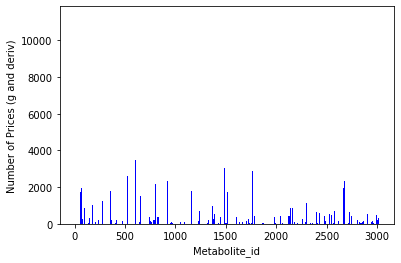

In [4]:
#sb.set_style("dark")
plt.bar(df["metabolite_id"], df["num_price_per_g"], color = 'blue')
plt.xlabel("Metabolite_id")
plt.ylabel("Number of Prices (g and deriv)")
plt.show()

In [5]:
fig = px.bar(df, x='metabolite_id', y='num_price_per_g')
fig.show()

In [6]:
data = [go.Bar(x=df.metabolite_id,
            y=df.num_price_per_g)]

py.iplot(data)